In [1]:
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
import zarr

## Opening the Zarr logo using PIL

In [2]:
image = Image.open("/Users/msankeys963/Downloads/Zarr Logos/Pixel/zarr_pixel.png")

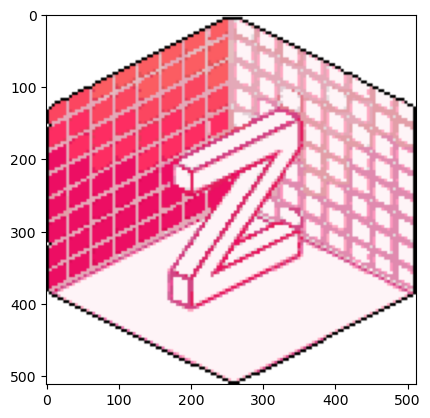

In [3]:
pyplot.imshow(image)

## Converting the Zarr logo into NumPy array using [asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html) function

In [4]:
numpydata = asarray(image)

In [5]:
type(numpydata)

numpy.ndarray

In [6]:
print(numpydata.shape)

(512, 512, 4)


In [7]:
print(numpydata)

[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


## Converting NumPy array into Zarr array using [zarr.array](https://zarr.readthedocs.io/en/stable/api/creation.html#zarr.creation.array) function

In [8]:
zarr_logo_zarr = zarr.array(numpydata)

In [9]:
zarr_logo_zarr.info

Type,zarr.core.Array
Data type,uint8
Shape,"(512, 512, 4)"
Chunk shape,"(256, 256, 4)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.KVStore
No. bytes,1048576 (1.0M)
No. bytes stored,107878 (105.3K)
Storage ratio,9.7


## Saving Zarr array (Zarr Pixel Logo)

In [10]:
zarr.save("zarr_logo_temp.zarr", zarr_logo_zarr)

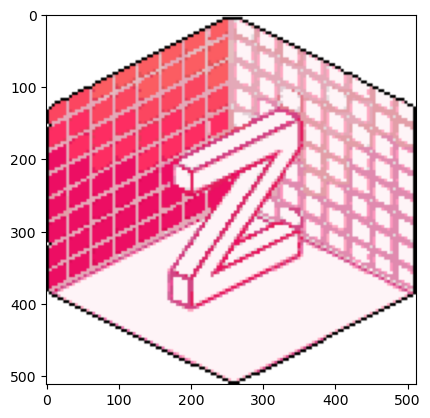

In [11]:
pyplot.imshow(zarr_logo_zarr)